<h1><center>Analysis of OSMI Mental Health Tech 2016</center></h1>

### **Author**: Julio Cárdenas-Rodríguez, [@julio](https://data.world/julio)
### License: MIT

In [1]:
# modules and authors
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load
df = pd.read_csv('https://query.data.world/s/bs6aqtm2l54gty0ng1vsgw37k')

<h1><center>Which countries answered the survey (Top 10)?</center></h1>

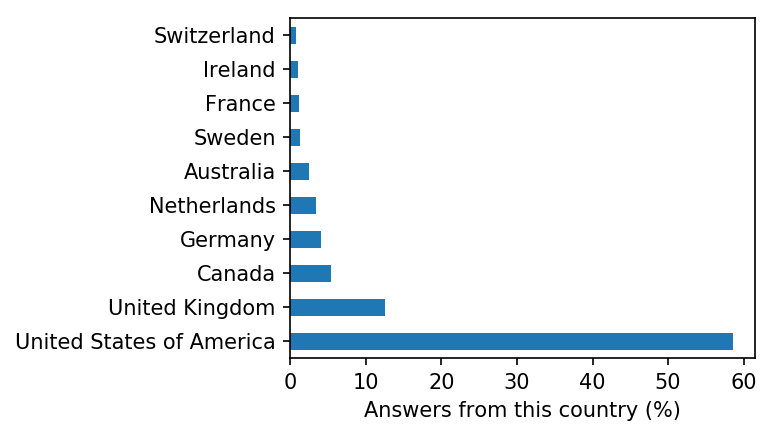

In [3]:
Total_Entries = df['What country do you live in?'].count()

plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='w')
df['What country do you live in?'].value_counts().apply(lambda x: x/Total_Entries * 100).iloc[:10].plot.barh()
plt.xlabel('Answers from this country (%)')
plt.savefig('Fig_01_Who_Answered.png')

<h1><center>Analysis of OSMI Mental Health Tech 2016</center></h1>